# Forward Feedback Loops

BME 3990 Final Project

Hannah Carroll

# Background
Feed forward loop are some of the most significant motifs in organisms like E.coli and yeast. One of the most common is the incoherent type 1 feed forward loop (I1-FFL). In this loop, X activates Y AND Z while Y represses Z. Incoherent forward feedback loops allow for rapid responses to stimuli. 

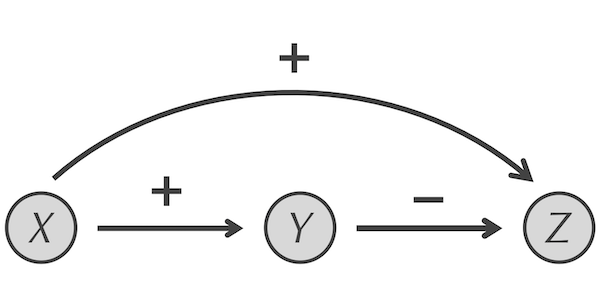

To model this, we will use the Hill activator and repressor function:

$\large f_{activator}(x)= \frac{x^n}{k^n + x^n}$

$\large f_{repressor}(x) = \frac{k^n}{k^n + x^n}$

To model concentrations of the 3 different components x, y and z of IL-FFL over time, we will model with 3 differential equations. 

$\frac{dx}{dt} = 0$

$\frac{{dy}}{{dt}} = f(x_1) - \alpha \cdot x_2$

$\frac{dz}{dt} = f(x_1, x_2) - \alpha \cdot x_3$

In [ ]:
%reset

In [11]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [25]:
# Define Function
# FFL_dynamics includes all t, x, beta, k and alpha parameters. 
# x is a vector of 3 differential equations
def FFL_dynamics(t, x, beta_1, beta_2, k_1, k_2, k_3, alpha2, alpha3):
    # x[0] = x1
    # x[1] = x2
    # x[2] = x3

    dydt = np.zeros(3)

    A1 = (beta_1 * (x[0]**n1)) / (k_1**n1 + x[0]**n1) #f(x1)
    A2 = (beta_2 * (x[0]**n2)) / (k_2**n2 + x[1]**n2) #f(x1)
    A3 = (beta_2 * (k_3**n3)) / (k_3**n3 + x[1]**n3) #f(x2)
    
    dydt[0] = 0
    dydt[1] = A1 - alpha2*x[1]
    dydt[2] = (A2 * A3) - alpha3*x[2]

    return dydt

In [22]:
# Define Parameters
n1 = n2 = n3 = 1 # no cooperativity
alpha2 = alpha3 = 1 # deg rate
beta_1 = beta_2 = 1
k_1 = k_2 = k_3 = 0.01 # sensitivity
# Initial Conditions
# start with a set value of x and 0 of y and z to see how x effects y and z
x_1 = 1 # x
x_2 = 0 # y
x_3 = 0 # z
x0 = [x_1, x_2, x_3]
# Time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,x:FFL_dynamics(t, x, beta_1, beta_2, k_1, k_2, k_3, alpha2, alpha3),tspan,x0,t_eval=t)

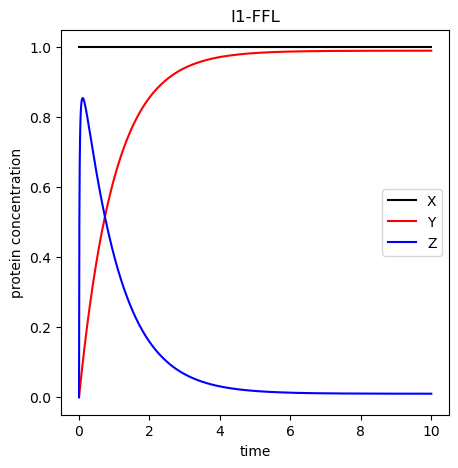

In [24]:
# plot
[fig,axs] = plt.subplots(1,1,figsize=[5,5])

axs.plot(t,ode_sol.y[0],'k-') # x concentration
axs.plot(t,ode_sol.y[1],'r-') # y concentration
axs.plot(t,ode_sol.y[2],'b-') # z concentration
axs.set_xlabel('time')
axs.set_ylabel('protein concentration')
axs.set_title('I1-FFL')
axs.legend(['X','Y','Z'])